In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [58]:
data1 = pd.read_csv('1.txt', names=['x', 'y'])
data2 = pd.read_csv('2.txt', names=['x', 'd1', 'd2', 'y'])
data3 = pd.read_csv('3.txt', names=['x', 'y'])

# 1. Файл 1. Корреляционный и регрессионный анализ
## 1.1 Коэффициент корреляции Пирсона
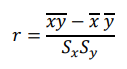
### В работе используется альтернативная формула:
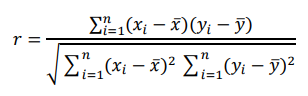

In [59]:
def pearson_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))

    r = numerator / denominator
    return r

In [33]:
pearson_correlation(data1.x, data1.y)

0.9848018797788715

## 1.2 Характеристика корреляционной связи
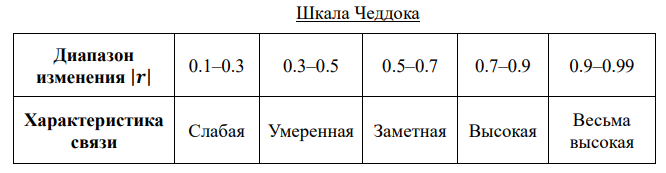
### В данном случае связь весьма высокая

## 1.3 Проверка значимости коэффициента корреляции
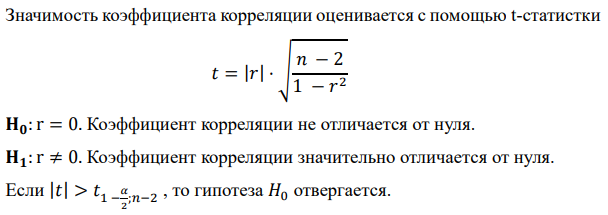

In [34]:
def check_correlation_significance(x, y, alpha=0.05):
    n = len(x)
    r = pearson_correlation(x, y)

    t_statistic = np.abs(r) * np.sqrt(n - 2) / np.sqrt(1 - r**2)

    t_crit = stats.t.ppf(1 - alpha / 2, df=n - 2)

    if t_statistic > t_crit:
        print(f"Гипотеза H0 отклоняется: t = {t_statistic:.2f} > t_критическое = {t_crit:.2f}, коэффициент значим")
    else:
        print(f"Гипотеза H0 не отклоняется: t = {t_statistic:.2f} <= t_критическое = {t_crit:.2f}, коэффициент не значим")

    return t_statistic

In [35]:
t_stat = check_correlation_significance(data1.x, data1.y)

Гипотеза H0 отклоняется: t = 56.13 > t_критическое = 1.98, коэффициент значим


## 1.4 Построение линейной регрессии
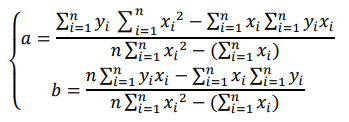
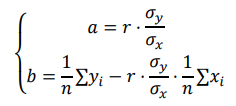
### Формула, использующаяся в работе, выведена из опр. r и двух формул для a и b

In [36]:
def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    a = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    b = y_mean - a * x_mean

    return a, b

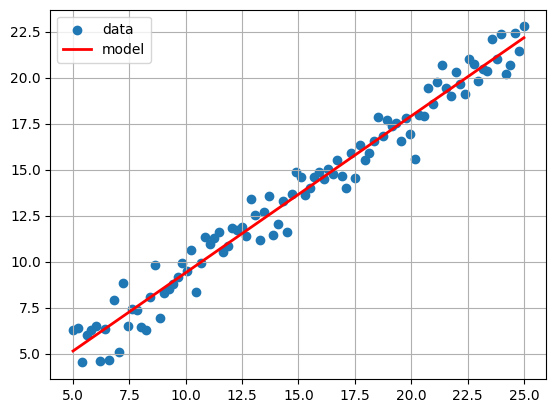

In [37]:
a, b = linear_regression(data1.x, data1.y)

plt.scatter(data1.x, data1.y, label='data')
plt.plot(data1.x, data1.x * a + b, c='r', lw=2, label='model')
plt.grid()
plt.legend()

## 1.5 Проверка адекватности модели критерием Фишера
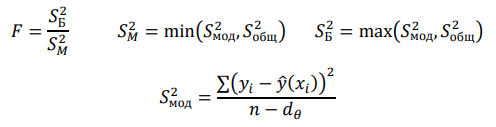
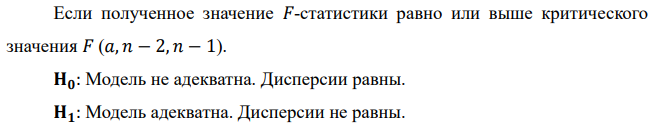

In [38]:
def f_test(x, y, y_pred, alpha=0.05):
    n = len(x)

    S2_general = np.sum((y - np.mean(y))**2) / (n - 1)
    S2_model = np.sum((y - y_pred)**2) / (n - 2)

    F = max(S2_general, S2_model) / min(S2_general, S2_model)

    f_crit = stats.f.ppf(1 - alpha, dfn=1, dfd=n - 2)

    if F > f_crit:
        print(f"Гипотеза H0 отклоняется: F = {F:.2f} > f_критическое = {f_crit:.2f}, модель адекватна")
    else:
        print(f"Гипотеза H0 не отклоняется: t = {F:.2f} <= f_критическое = {f_crit:.2f}, модель не адекватна")

    return F

In [39]:
F = f_test(data1.x, data1.y, data1.x * a + b)

Гипотеза H0 отклоняется: F = 32.82 > f_критическое = 3.94, модель адекватна


# 1.6 Проверка значимости коэффициентов
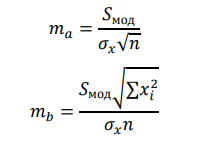
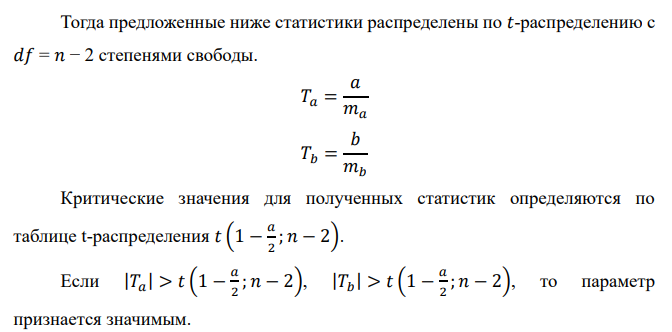

In [40]:
def t_statistics(x, y, a, b, alpha=0.05):
    n = len(x)
    y_pred = a * x + b
    S2_model = np.sum((y - y_pred)**2) / (n - 2)

    m_a = S2_model / np.sqrt(np.sum((x - np.mean(x))**2))
    m_b = m_a * np.sqrt(np.mean(x**2))

    t_a = a / m_a
    t_b = b / m_b

    t_crit = stats.t.ppf(1 - alpha / 2, df=n-2)

    if t_a > t_crit:
        print(f"Гипотеза H0 отклоняется: t = {t_a:.2f} > t_критическое = {t_crit:.2f}, параметр a значим")
    else:
        print(f"Гипотеза H0 не отклоняется: t = {t_a:.2f} <= t_критическое = {t_crit:.2f}, параметр a не значим")

    if t_b > t_crit:
        print(f"Гипотеза H0 отклоняется: t = {t_b:.2f} > t_критическое = {t_crit:.2f}, параметр b значим")
    else:
        print(f"Гипотеза H0 не отклоняется: t = {t_b:.2f} <= t_критическое = {t_crit:.2f}, параметр b не значим")

    return t_a, t_b, m_a, m_b

In [41]:
t_stat = t_statistics(data1.x, data1.y, a, b)

Гипотеза H0 отклоняется: t = 63.46 > t_критическое = 1.98, параметр a значим
Гипотеза H0 отклоняется: t = 4.10 > t_критическое = 1.98, параметр b значим


## 1.7 Доверительные интервалы для коэффициентов
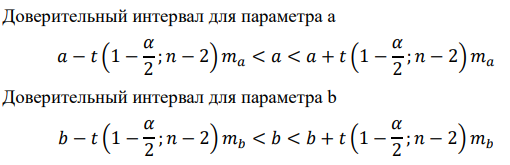

In [42]:
def confidence_intervals(a, b, m_a, m_b, alpha=0.05, n=100):
    t_critical = stats.t.ppf(1 - alpha / 2, df=n - 2)

    ci_a = (a - t_critical * m_a, a + t_critical * m_a)
    ci_b = (b - t_critical * m_b, b + t_critical * m_b)

    return ci_a, ci_b

In [43]:
ci_a, ci_b = confidence_intervals(a, b, t_stat[2], t_stat[3])
print(ci_a, '\n', ci_b)

(0.8247942375544548, 0.8780451490119294) 
 (0.4567208132374702, 1.313724269620853)


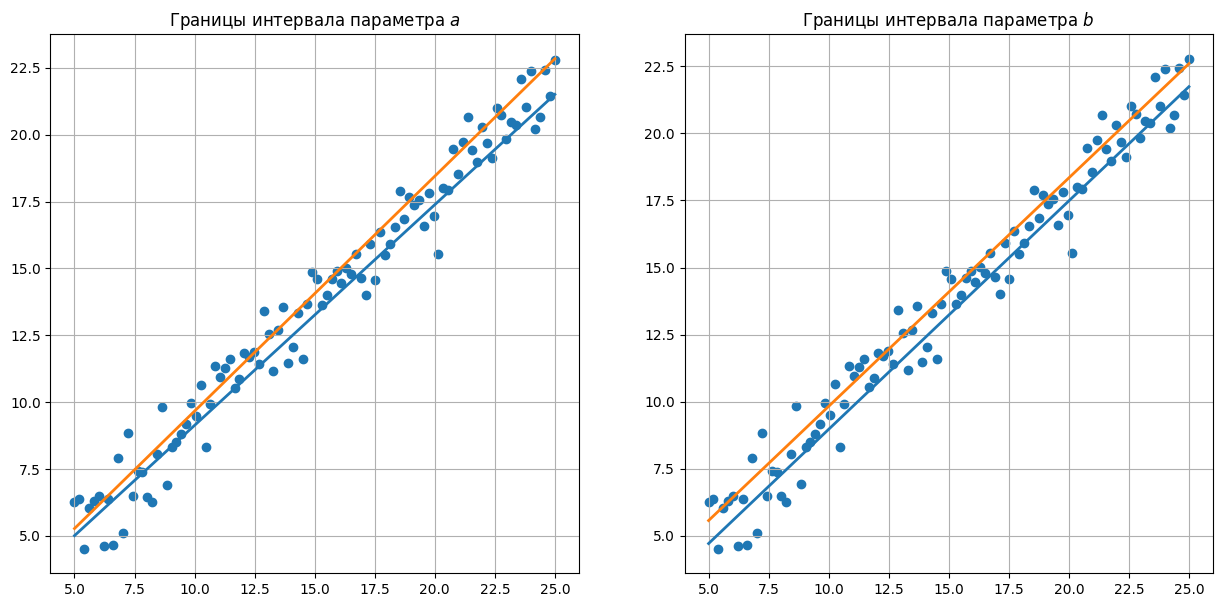

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].set_title('Границы интервала параметра $а$')
axes[0].scatter(data1.x, data1.y)
axes[0].plot(data1.x, data1.x * ci_a[0] + b, lw=2)
axes[0].plot(data1.x, data1.x * ci_a[1] + b, lw=2)

axes[1].set_title('Границы интервала параметра $b$')
axes[1].scatter(data1.x, data1.y)
axes[1].plot(data1.x, data1.x * a + ci_b[0], lw=2)
axes[1].plot(data1.x, data1.x * a + ci_b[1], lw=2)

axes[0].grid()
axes[1].grid()

## 1.8 Доверительный интервал прогноза
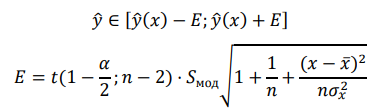

In [45]:
def prediction_interval(x, y, x_new, y_pred, alpha=0.05):
    n = len(x)
    t_critical = stats.t.ppf(1 - alpha / 2, df=n - 2)
    SSE = np.sum((y - y_pred)**2)

    SE_pred = np.sqrt((SSE / (n - 2)) * (1 + 1/n + (x_new - x.mean()) ** 2 / np.sum((x - x.mean()) ** 2)))
    ci_pred = (y_pred - t_critical * SE_pred, y_pred + t_critical * SE_pred)

    return ci_pred

In [67]:
print(f"Используемое значение x: {max(data1.x)}")
print(f"Предсказанное значение y: {np.round(max(data1.x)+3 * a + b, 2)}")
intv = prediction_interval(data1.x, data1.y, max(data1.x)+3, max(data1.x)+3 * a + b, alpha=0.95)
intv = [np.round(i,2) for i in intv]
print(f"Доверительный интервал прогноза: {intv}")

Используемое значение x: 25.0
Предсказанное значение y: 21.52
Доверительный интервал прогноза: [20.91, 22.13]


# 2. Файл 2. Тест Чоу
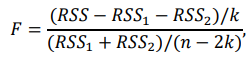
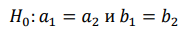
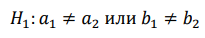
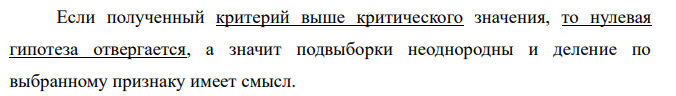

In [47]:
def residual_sum_of_squares(x, y, a, b):
    y_pred = a * x + b
    residuals = y - y_pred
    RSS = np.sum(residuals ** 2)
    return RSS

def chow_test(x_full, y_full, x1, y1, x2, y2, alpha=0.05):
    a_full, b_full = linear_regression(x_full, y_full)
    RSS_full = residual_sum_of_squares(x_full, y_full, a_full, b_full)

    a1, b1 = linear_regression(x1, y1)
    RSS1 = residual_sum_of_squares(x1, y1, a1, b1)

    a2, b2 = linear_regression(x2, y2)
    RSS2 = residual_sum_of_squares(x2, y2, a2, b2)

    k = 2
    n = len(x_full)

    F = ((RSS_full - (RSS1 + RSS2)) / k) / ((RSS1 + RSS2) / (n - 2 * k))

    f_crit = stats.f.ppf(1 - alpha, k, n - 2 * k)

    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    axes[0].scatter(x1, y1)
    axes[0].plot(x1, x1 * a1 + b1)
    axes[0].set_title('d = 0')

    axes[1].scatter(x2, y2)
    axes[1].plot(x2, x2 * a2 + b2)
    axes[1].set_title('d = 1')

    if F > f_crit:
        print(f"Гипотеза H0 отклоняется: F = {F:.2f} > f_критическое = {f_crit:.2f}, разбиение имеет смысл")
    else:
        print(f"Гипотеза H0 не отклоняется: F = {F:.2f} <= f_критическое = {f_crit:.2f}, разбиение не имеет смысла")

    return F

Гипотеза H0 отклоняется: F = 15115.01 > f_критическое = 3.04, разбиение имеет смысл


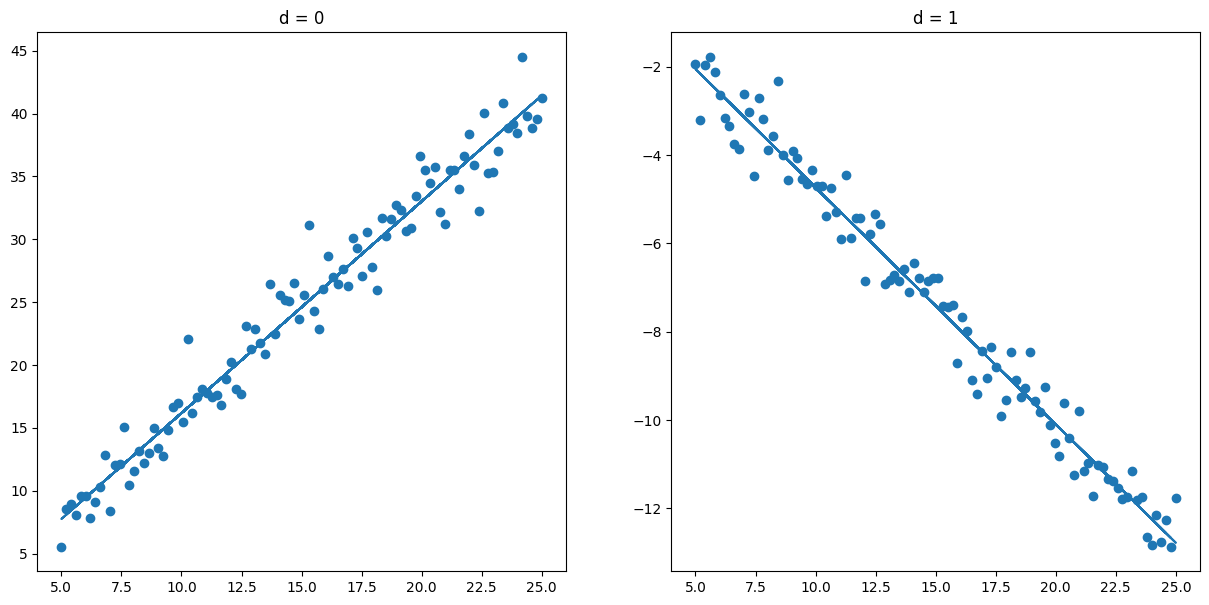

In [48]:
F = chow_test(data2.x, data2.y, data2[data2.d1 == 0].x, data2[data2.d1 == 0].y, data2[data2.d1 == 1].x, data2[data2.d1 == 1].y)

Гипотеза H0 не отклоняется: F = 1.23 <= f_критическое = 3.04, разбиение не имеет смысла


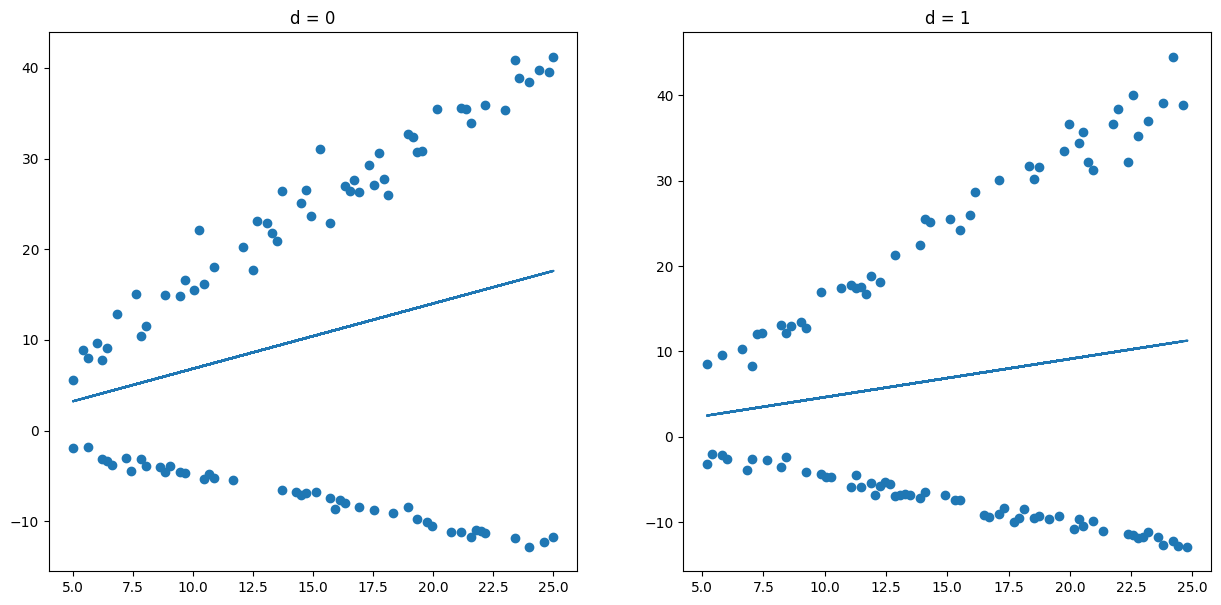

In [49]:
F = chow_test(data2.x, data2.y, data2[data2.d2 == 0].x, data2[data2.d2 == 0].y, data2[data2.d2 == 1].x, data2[data2.d2 == 1].y)

# 3. Файл 3. Гетероскедастичные данные
## 3.1 Построение и оценка линейной регрессии

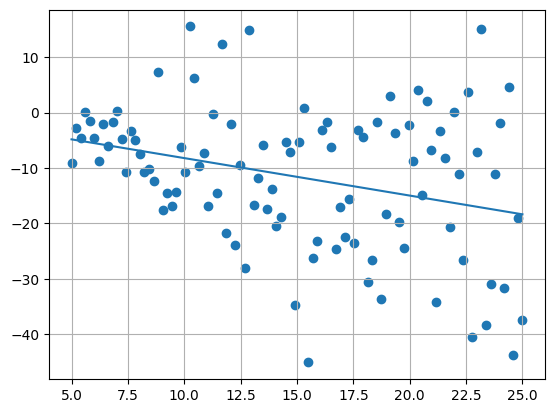

In [50]:
a, b = linear_regression(data3.x, data3.y)

plt.scatter(data3.x, data3.y)
plt.plot(data3.x, data3.x * a + b)
plt.grid()

In [51]:
F = f_test(data3.x, data3.y, data3.x * a + b)

Гипотеза H0 не отклоняется: t = 1.09 <= f_критическое = 3.94, модель не адекватна


In [52]:
t_stat = t_statistics(data1.x, data1.y, a, b)

Гипотеза H0 не отклоняется: t = -0.05 <= t_критическое = 1.98, параметр a не значим
Гипотеза H0 не отклоняется: t = -0.01 <= t_критическое = 1.98, параметр b не значим


## 3.2 Тест Спирмена на гетероскедастичность
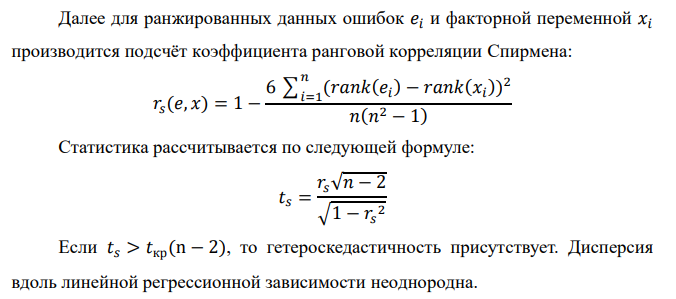

In [53]:
def spearman_test(x, y, a, b, alpha=0.05):

    f_x = x * a + b
    residuals = np.abs(y - f_x)

    def rank_array(arr):
        temp = arr.argsort()
        ranks = np.empty_like(temp)
        ranks[temp] = np.arange(1, len(arr) + 1)
        return ranks

    rank_x = rank_array(x)
    rank_e = rank_array(residuals)

    d_2 = (rank_e - rank_x) ** 2

    n = len(x)
    spearman_corr = 1 - (6 * np.sum(d_2)) / (n * (n ** 2 - 1))

    t_s = spearman_corr * np.sqrt(n - 2) / np.sqrt(1 - spearman_corr ** 2)

    t_crit = stats.t.ppf(1 - alpha, df=n - 2)

    if t_s > t_crit:
        print(f"Гипотеза H0 отклоняется: t = {t_s:.2f} > t_критическое = {t_crit:.2f}, присутствует гетероскедастичность")
    else:
        print(f"Гипотеза H0 не отклоняется: t = {t_s:.2f} <= t_критическое = {t_crit:.2f}, отсутствует гетероскедастичность")

    return t_s

In [54]:
t = spearman_test(data3.x, data3.y, a, b)

Гипотеза H0 отклоняется: t = 6.13 > t_критическое = 1.66, присутствует гетероскедастичность


## 3.3 Тест Гольдфельда-Квандта на гетероскедастичность
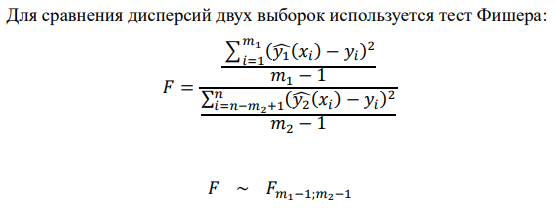
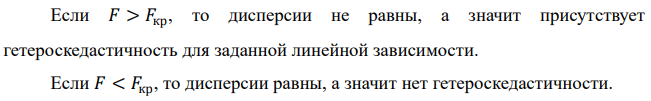

In [55]:
def goldfeld_quandt_test(x, y, a, b, split_ratio=3/8, alpha=0.05):
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    y_pred = a * x_sorted + b
    residuals = np.abs(y_sorted - y_pred)

    n = len(x_sorted)
    split_point = int(n * split_ratio)

    residuals1 = residuals[:split_point]
    residuals2 = residuals[-split_point:]

    RSS1 = np.sum(residuals1 ** 2) / (split_point - 1)
    RSS2 = np.sum(residuals2 ** 2) / (split_point - 1)

    F = RSS2 / RSS1 if RSS2 > RSS1 else RSS1 / RSS2

    dfn = split_point - 1
    dfd = split_point - 1
    f_crit = stats.f.ppf(1 - alpha, dfn, dfd)

    if F > f_crit:
        print(f"Гипотеза H0 отклоняется: F = {F:.2f} > f_критическое = {f_crit:.2f}, присутствует гетероскедастичность")
    else:
        print(f"Гипотеза H0 не отклоняется: F = {F:.2f} <= f_критическое = {f_crit:.2f}, отсутствует гетероскедастичность")

    return F

In [56]:
F = goldfeld_quandt_test(data3.x, data3.y, a, b)

Гипотеза H0 отклоняется: F = 3.27 > f_критическое = 1.74, присутствует гетероскедастичность
